**Setup**

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**Defining agents and beliefs**

In [23]:
num_agents = 10
num_timesteps = 10

beliefs_initial = np.ones(num_agents) * 0.9
beliefs_initial[0] = 0.2 # misaligned agent

G = nx.erdos_renyi_graph(num_agents, 0.1)

adj_matrix = nx.to_numpy_array(G)
sum_rows = adj_matrix.sum(axis = 1, keepdims = True)
sum_rows[sum_rows == 0] = 1 # prevent division by 0
adj_matrix = adj_matrix / sum_rows # weighted average

**Run simulation**

In [30]:
beliefs_over_time = [beliefs_initial.copy()]
beliefs_current = beliefs_initial.copy()

for run in range(num_timesteps):
  # to prevent disconnected nodes from being updated
  beliefs_new = np.zeros(num_agents)

  for agent in range(num_agents):
    if G.degree[agent] == 0:
      beliefs_new[agent] = beliefs_current[agent]
    else:
      beliefs_new[agent] = adj_matrix[agent] @ beliefs_current

  beliefs_over_time.append(beliefs_new.copy())
  beliefs_current = beliefs_new

**Visualize drift**

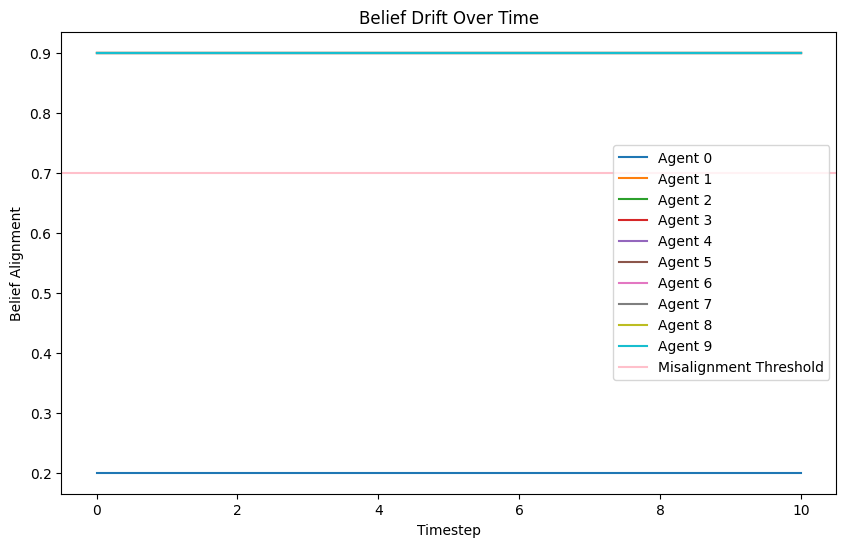

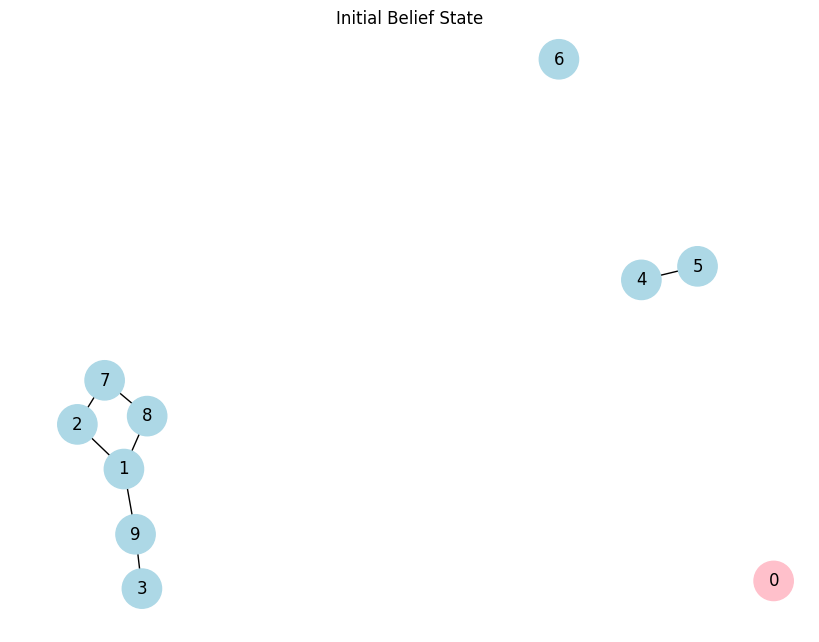

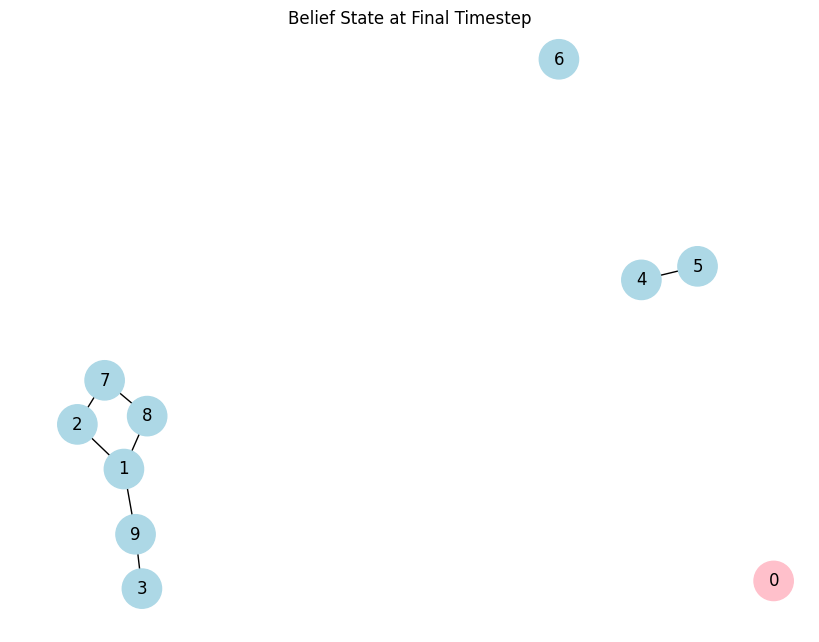

In [33]:
def plot_belief_drift(beliefs_over_time, misalignment_threshold = 0.7, title = "Belief Drift Over Time"):
  """
  Plot the belief values of each agent over time.

  Parameters:
   - beliefs_over_time: np.array of shape (num_timesteps, num_agents)
   - misalignment_threshold: float, threshold for misalignment
    - title: str, title of plot
  """
  plt.figure(figsize = (10, 6))

  for agent in range(num_agents):
    plt.plot(beliefs_over_time[:, agent], label = f'Agent {agent}')

  plt.xlabel('Timestep')
  plt.ylabel('Belief Alignment')
  plt.axhline(misalignment_threshold, color="pink", label = "Misalignment Threshold")
  plt.legend()
  plt.title(title)
  plt.show()


def visualize_graph(G, beliefs, threshold=0.7, title="Agent Influence Graph"):
    """
    Visualize agent network with node colors based on belief alignment.

    Parameters:
    - G: networkx Graph
    - beliefs: list or array of belief values at current timestep
    - threshold: alignment cutoff
    """
    pos = nx.spring_layout(G, seed=15)

    # color nodes based on belief
    node_colors = []
    for belief in beliefs:
        if belief < threshold:
            node_colors.append("pink")  # misaligned
        else:
            node_colors.append("lightblue")  # aligned

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color = node_colors, node_size=800)
    plt.title(title)
    plt.axis("off")
    plt.show()

plot_belief_drift(beliefs_over_time, misalignment_threshold=0.7)
final_beliefs = beliefs_over_time[-1]
visualize_graph(G, beliefs_initial, title="Initial Belief State")
visualize_graph(G, final_beliefs, title="Belief State at Final Timestep")